In [1]:
# Python ≥3.5 is required
#Using the existing libraries
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.cluster import KMeans
#2. Load the dataset
data = pd.read_csv('hw07_data.csv')

#3. Create a KMeans instance with 40 clusters
kmeans = KMeans(n_clusters=40, random_state=0, n_init=10)

kmeans.fit(data)

print("Inertia:", kmeans.inertia_)

Inertia: 7789.134461044526


In [3]:
# 4.a Initialize lists to hold inertia values
inertia_values = []
k_values = []
# Initialize cluster number
cluster_number = 5

# Run KMeans for each number of clusters using a while loop
while cluster_number <= 150:
    kmeans = KMeans(n_clusters=cluster_number, n_init=10, random_state=0).fit(data)
    inertia_values.append(kmeans.inertia_)
    k_values.append(cluster_number)
    cluster_number += 5

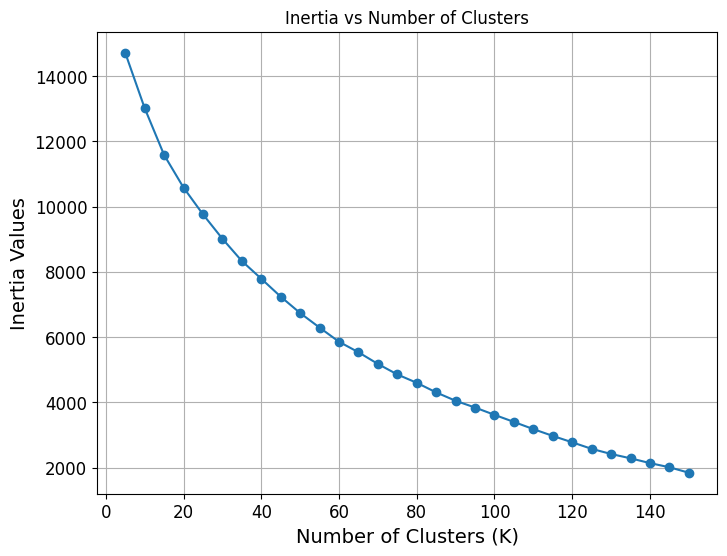

In [4]:
# 4.c Create a plot
plt.figure(figsize=(8,6))

# Plot the inertia values vs the number of clusters
plt.plot(k_values, inertia_values, marker='o')

# Add labels and title
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia Values')
plt.title('Inertia vs Number of Clusters')
plt.grid(True)
plt.show()

# 
- It's difficult to identify a clear elbow point on the graph as the reduction in inertia continues at a steady pace. While there is a slight change in the rate of decline at k= 55, it's not clear enough to confidently pinpoint the best number of clusters. The graph suggests that there could be room for improvement with more clusters, but without a distinct elbow it's challenging to make a exact recommendation based on this plot.

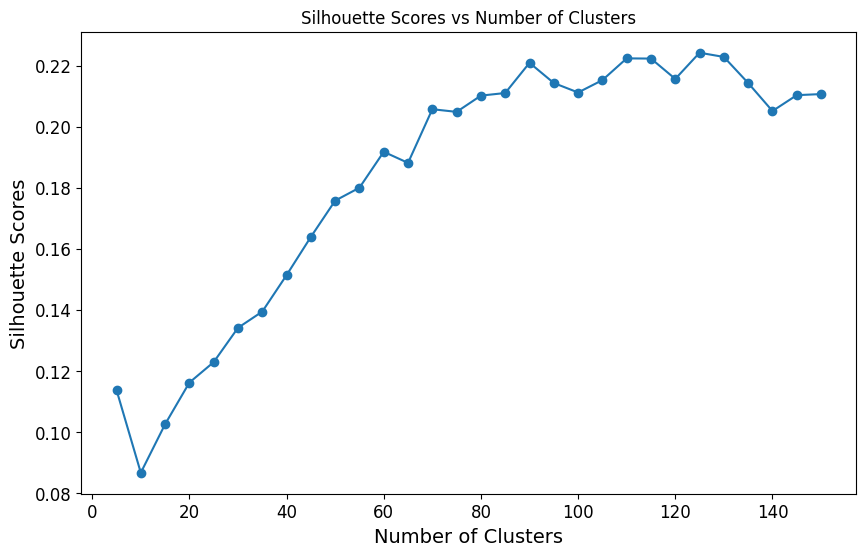

In [5]:
from sklearn.metrics import silhouette_score

# 4.d Load the dataset (assuming it's already loaded if this is a continuation)

# Initialize a list to hold the silhouette scores
sil_scores = []

# Calculate silhouette scores for each number of clusters
cluster_numbers = list(range(5, 151, 5))  # Adjust the range as needed
for k in cluster_numbers:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(data)
    score = silhouette_score(data, kmeans.labels_)
    sil_scores.append(score)

# Plot silhouette scores vs number of clusters
plt.figure(figsize=(10,6))
plt.plot(cluster_numbers, sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores vs Number of Clusters')
plt.show()

#4.e 
- Among all the K values considered, it seems that the optimal point is at k=110. There are no higher points beyond this value. However, it's worth noting that there are 280 data points and 110 clusters, and the Silhouette Score remains relatively low at k=110. In a previous analysis using the elbow method, k=55 was selected, which demonstrated a significant increase in the Silhouette Score compared to lower K values. As we progress beyond k=55, the rate of return per increment starts to diminish, but it can still increase by 50% by the time we reach k=110.

In [12]:
#5. 
from matplotlib.image import imread
# Load the image
image = imread("sea.jpg")
image.shape

(100, 132, 3)

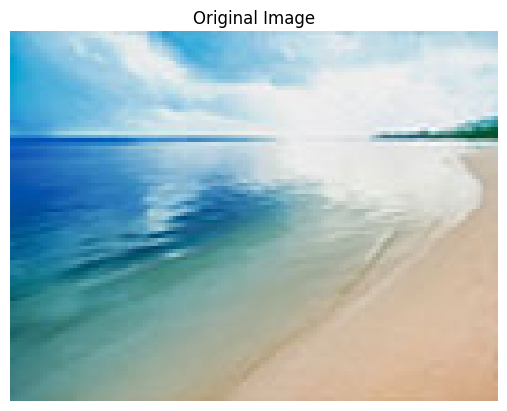

In [13]:
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')
plt.show()

In [14]:
#5.b
# Convert the image to numpy array and normalize it

image = image/255.0 # convert to 0...1 scale
X = image.reshape(-1, 3)
X.shape

(13200, 3)

In [16]:
#5.c
from sklearn.cluster import MiniBatchKMeans
# Run Mini-Batch KMeans for K=16 and K=8
kmeans_16 = MiniBatchKMeans(n_clusters = 16, n_init=10)
kmeans_16.fit(X)
new_colors = kmeans_16.cluster_centers_[kmeans_16.predict(X)]
new_colors_16 = new_colors.reshape(image.shape)
%timeit kmeans_16.fit(X)

kmeans_8 = MiniBatchKMeans(n_clusters = 8, n_init=10)
kmeans_8.fit(X)
new_colors = kmeans_8.cluster_centers_[kmeans_8.predict(X)]
new_colors_8 = new_colors.reshape(image.shape)
%timeit kmeans_8.fit(X)

101 ms ± 9.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
168 ms ± 38.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


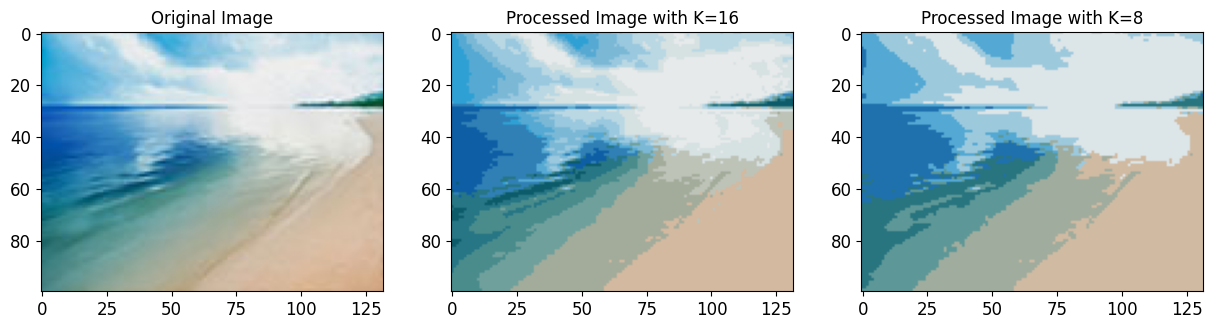

In [17]:
# 5.d
# 
plt.figure(figsize=(15,5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')

# Display processed image with K=16
plt.subplot(1, 3, 2)
plt.imshow(new_colors_16)
plt.title('Processed Image with K=16')

# Display processed image with K=8
plt.subplot(1, 3, 3)
plt.imshow(new_colors_8)
plt.title('Processed Image with K=8')

# Show the plots
plt.show()